In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('data-02-stock_daily.csv')
xy = np.loadtxt('data-02-stock_daily.csv' , delimiter="," , skiprows=2)

In [2]:
df

,# http://finance.yahoo.com/quote/GOOG/history?ltr=1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Open,High,Low,Volume,Close
1,828.659973,833.450012,828.349976,1247700,831.659973
2,823.02002,828.070007,821.655029,1597800,828.070007
3,819.929993,824.400024,818.97998,1281700,824.159973
4,819.359985,823,818.469971,1304000,818.97998
...,...,...,...,...,...
728,599.992707,604.832763,562.192568,147100,567.002574
729,558.712504,568.452595,558.712504,7900,567.162558
730,566.892592,567.002574,556.932537,10800,556.972503
731,561.202549,566.43259,558.672539,41200,559.992565


In [3]:
xy.shape

(732, 5)

In [4]:
xy = xy[::-1]

In [5]:
xy

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [6]:
xy.shape

(732, 5)

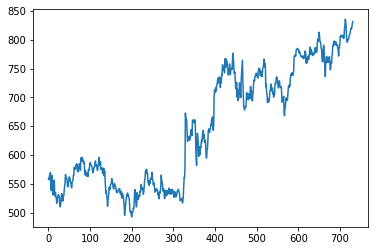

In [19]:
import matplotlib.pyplot as plt

plt.plot(xy[:, 4])
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

seqLength = 7
dataDim = 5
hiddenDim = 10
outputDim = 1
lr = 0.01
iterations = 500

trainSize = int(len(xy)*0.7)
trainSet = xy[0:trainSize]
testSet = xy[trainSize -7 :  ]


scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(trainSet)
trainSet = scaler.transform(trainSet)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(testSet)
testSet = scaler.transform(testSet)

In [9]:
print(trainSize)
print(trainSet.shape)
print(testSet.shape)

512
(512, 5)
(227, 5)


여기까지 train / test 셋 분리

---

seqLength = 7 <br>
dataDim = 5 <br>
hiddenDim = 10 <br>
outputDim = 1 <br>
lr = 0.01 <br>
iterations = 500

In [10]:
def buildDataSet(timeSeries , seqLength):
    xdata= []
    ydata = []
    for i in range(0 , len(timeSeries)- seqLength):
        tx = timeSeries[i:i+seqLength, : -1]
        ty = timeSeries[i+seqLength, [-1]]
        xdata.append(tx)
        ydata.append(ty)
    
    print(xdata)
    print(ydata)

    return np.array(xdata),np.array(ydata)


trainX , trainY = buildDataSet(trainSet, seqLength)
testX , testY = buildDataSet(testSet, seqLength)

[array([[2.53065031e-01, 2.45070970e-01, 2.33983036e-01, 4.66075110e-04],
       [2.29604366e-01, 2.39728936e-01, 2.54567513e-01, 2.98467330e-03],
       [2.49235510e-01, 2.41668371e-01, 2.48338489e-01, 2.59926504e-04],
       [2.21013495e-01, 2.46602231e-01, 2.54710584e-01, 0.00000000e+00],
       [3.63433786e-01, 3.70389871e-01, 2.67168847e-01, 1.24764722e-02],
       [2.59447633e-01, 3.10673724e-01, 2.74113889e-01, 4.56323384e-01],
       [2.76008151e-01, 2.78314566e-01, 1.98470380e-01, 5.70171193e-01]]), array([[2.29604366e-01, 2.39728936e-01, 2.54567513e-01, 2.98467330e-03],
       [2.49235510e-01, 2.41668371e-01, 2.48338489e-01, 2.59926504e-04],
       [2.21013495e-01, 2.46602231e-01, 2.54710584e-01, 0.00000000e+00],
       [3.63433786e-01, 3.70389871e-01, 2.67168847e-01, 1.24764722e-02],
       [2.59447633e-01, 3.10673724e-01, 2.74113889e-01, 4.56323384e-01],
       [2.76008151e-01, 2.78314566e-01, 1.98470380e-01, 5.70171193e-01],
       [1.59015228e-01, 1.78651664e-01, 1.417286

In [11]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(505, 7, 4)
(505, 1)
(220, 7, 4)
(220, 1)


#### SimpleRnn 예측 및 평가 

In [35]:
from tensorflow.keras.layers import SimpleRNN , LSTM , GRU , Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=10 , activation='tanh', input_shape=[7 ,4]))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                150       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='mse' , optimizer='adam', metrics=['mse'] )

In [42]:
hist = model.fit(trainX , trainY ,epochs=1000, batch_size=16)

Epoch 1/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0018 - mse: 0.0018
Epoch 2/1000
32/32 [==============================] - 0s 13ms/step - loss: 0.0018 - mse: 0.0018 - ETA: 0s - loss: 0.0017 - mse: 0.0
Epoch 3/1000
32/32 [==============================] - 0s 12ms/step - loss: 0.0017 - mse: 0.0017
Epoch 4/1000
32/32 [==============================] - 0s 16ms/step - loss: 0.0017 - mse: 0.0017: 0s - loss: 0.0020 - mse: 
Epoch 5/1000
32/32 [==============================] - 0s 12ms/step - loss: 0.0017 - mse: 0.0017
Epoch 6/1000
32/32 [==============================] - 0s 14ms/step - loss: 0.0017 - mse: 0.0017
Epoch 7/1000
32/32 [==============================] - 0s 12ms/step - loss: 0.0017 - mse: 0.0017: 0s - loss: 0.0013 - mse: 0.0
Epoch 8/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.0017 - mse: 0.0017
Epoch 9/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0016 - mse: 0.0016
Epoch 10/1000
32/32 [=======================

32/32 [==============================] - 0s 8ms/step - loss: 0.0013 - mse: 0.0013  
Epoch 80/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014   
Epoch 81/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013
Epoch 82/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013  
Epoch 83/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013
Epoch 84/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014 
Epoch 85/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0013 - mse: 0.0013 
Epoch 86/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 
Epoch 87/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.0014 
Epoch 88/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013
Epoch 89/1000
32/32 [======================

32/32 [==============================] - 0s 7ms/step - loss: 0.0013 - mse: 0.0013
Epoch 159/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013
Epoch 160/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0013 - mse: 0.0013 
Epoch 161/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012
Epoch 162/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013
Epoch 163/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013   
Epoch 164/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012
Epoch 165/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012
Epoch 166/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013
Epoch 167/1000
32/32 [==============================] - ETA: 0s - loss: 0.0012 - mse: 0.001 - 0s 7ms/step - loss: 0.0012 - mse: 0.0012
Epo

32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012
Epoch 240/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 241/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012
Epoch 242/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 243/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 244/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 245/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013
Epoch 246/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 247/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 248/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013  
Epoch 249/1000
32/32 [=======

32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 320/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012 
Epoch 321/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 322/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 323/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012
Epoch 324/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012
Epoch 325/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 326/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 327/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 328/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 329/1000
32/32 [==

32/32 [==============================] - 0s 10ms/step - loss: 0.0013 - mse: 0.0013
Epoch 402/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012
Epoch 403/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 404/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0012 - mse: 0.0012   - ETA: 0s - loss: 0.0013 - mse: 0.
Epoch 405/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 406/1000
32/32 [==============================] - 0s 12ms/step - loss: 0.0012 - mse: 0.0012   - ETA: 0s - loss: 9.2601e-04 - mse: 9.2601
Epoch 407/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.0012 - mse: 0.0012
Epoch 408/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 409/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012   - ETA: 0s - loss: 0.0012 - mse: 0.001
Epoch 41

32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 
Epoch 481/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 482/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 483/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 484/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0011 - mse: 0.0011
Epoch 485/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 486/1000
32/32 [==============================] - 0s 14ms/step - loss: 0.0011 - mse: 0.0011
Epoch 487/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011
Epoch 488/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 489/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011
Epoch 490/1000
32/32 [========

32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 560/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 
Epoch 561/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012
Epoch 562/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 563/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 564/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 565/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 566/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011
Epoch 567/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 
Epoch 568/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 569/1000
32/32 [========

32/32 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 638/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 639/1000
32/32 [==============================] - 0s 16ms/step - loss: 0.0011 - mse: 0.0011
Epoch 640/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 641/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 642/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 643/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011  
Epoch 644/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011
Epoch 645/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 646/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 647/1000
32/32 [

32/32 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010  
Epoch 715/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 716/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 717/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 718/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 
Epoch 719/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010  
Epoch 720/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011
Epoch 721/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 722/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 723/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 724/1000
32/

32/32 [==============================] - 0s 11ms/step - loss: 0.0011 - mse: 0.0011   - ETA: 0s - loss: 0.0011 - mse: 0.00
Epoch 794/1000
32/32 [==============================] - 0s 12ms/step - loss: 0.0010 - mse: 0.0010
Epoch 795/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.0010 - mse: 0.0010 - ETA: 0s - loss: 0.0011 - mse: 0.001
Epoch 796/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0010 - mse: 0.0010 
Epoch 797/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0011
Epoch 798/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0010 - mse: 0.0010  
Epoch 799/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 800/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010   
Epoch 801/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 802/1000
32/32 [==============================]

32/32 [==============================] - 0s 9ms/step - loss: 0.0010 - mse: 0.0010
Epoch 872/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010
Epoch 873/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0010 - mse: 0.0010  
Epoch 874/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0010 - mse: 0.0010 
Epoch 875/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0010 - mse: 0.0010   
Epoch 876/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0010 - mse: 0.0010
Epoch 877/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010  
Epoch 878/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0011 - mse: 0.0011 
Epoch 879/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 880/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0010 - mse: 0.0010   
Epoch 881/1000
32/32 [==

32/32 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 952/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 953/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010 
Epoch 954/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 955/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010  
Epoch 956/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011   
Epoch 957/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010 
Epoch 958/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 959/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010   
Epoch 960/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 961/1000


In [44]:
#모델 테스트
res = model.evaluate(testX , testY , batch_size=16)
print(f'lost:{res[0]} ,mae:{res[1]}')

14/14 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
lost:0.002719094045460224 ,mae:0.002719094045460224


In [47]:
#모델을 사용해서 예측

yhat = model.predict(testX)


print(f'mse evaluate : {np.average(yhat-testY)**2}')

mse evaluate : 9.074076010058202e-05


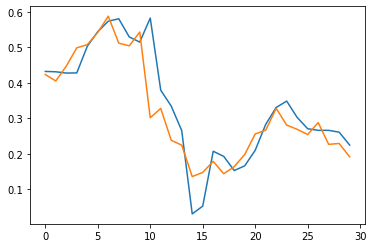

In [60]:
yhat.shape
testY.shape

plt.plot(yhat[:30], label="Predict_RNN")
plt.plot(testY[:30], label="real")